<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.4
# *PCA Lab*

**In this lab, we will:**
- Explore how PCA is related to correlation.
- Use PCA to perform dimensionality reduction.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [2]:
# IMPORT LABRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

%matplotlib inline
plt.style.use('ggplot')

In [3]:
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'

In [4]:
class ModelData:
    
    def __init__(self, csv):
        
        df = pd.read_csv(csv)
        
        self.X_train, self.X_test, self.y_train, self.y_test = [], [], [], []
        
        self.X, self.y = [], []
        
        self.df = df
    
    def get_tts(self, features, target, n = 0.2, r_state = 42):
        
        self.X = self.df[features]
        
        self.y = np.ravel(self.df[target])
        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size = n,
                                                                               random_state = r_state)
        
class ModelParams:
    
    def __init__(self,model):
        pass
        
        

### 2. EDA 

Explore dataset. Clean data. Find correlation. 

In [5]:
cancer = ModelData(breast_cancer_csv)
cancer.df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [6]:
cancer.df.diagnosis.replace(to_replace='M', value=1,inplace=True) #Malignant -- presence of cancer
cancer.df.diagnosis.replace(to_replace='B', value=0,inplace=True) #Benign -- absence of cancer
cancer.df = cancer.df.drop(['Unnamed: 32'], axis = 1)
features = cancer.df.columns[2:]
target = ['diagnosis']
cancer.get_tts(features,target)

### 3. Subset & Standardised

Subset the data to only include all columns except diagnosis. We will be comparing the principal components to diagnosis specifically, so we are leaving diagnosis out.

In [7]:
# ANSWER
cancer.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Calculate correlation matrix

We will be using the correlation matrix to calculate the eigenvectors and eigenvalues.

<AxesSubplot:>

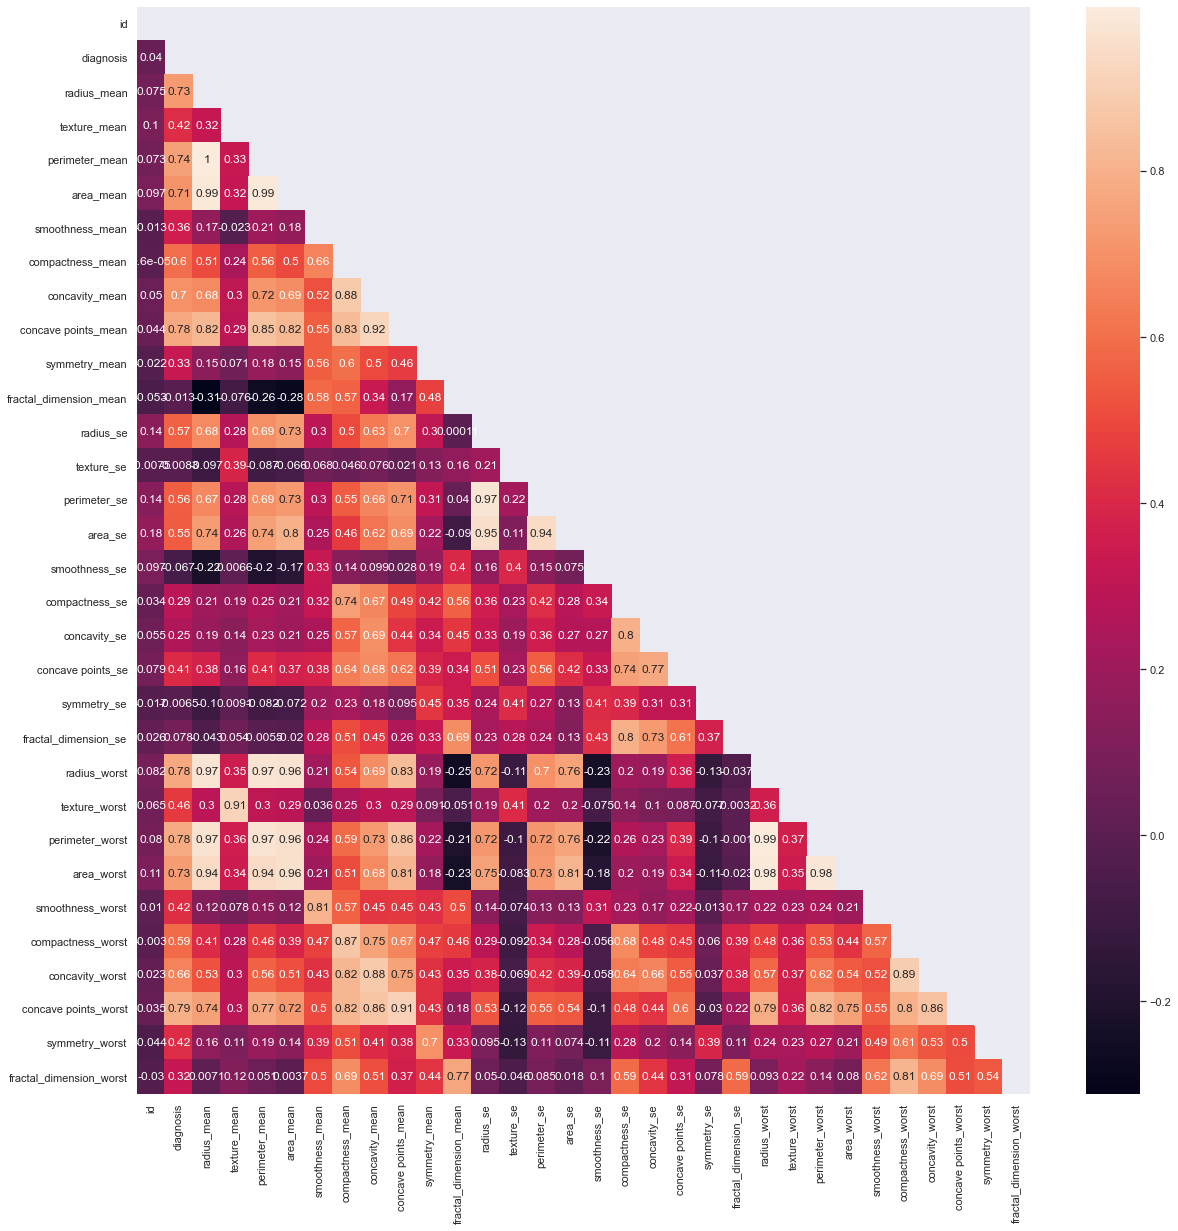

In [8]:
# ANSWER
corr = cancer.df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale=1.0)
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,mask=mask)

### 4. Calculate the eigenvalues and eigenvectors from the correlation matrix

numpy has a convenient function to calculate this:

    eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

In [9]:
# ANSWER

e_val, e_vec = np.linalg.eig(corr)
e_val, e_vec

(array([1.39240329e+01, 5.73130664e+00, 2.86492379e+00, 1.99913213e+00,
        1.65913439e+00, 1.23470274e+00, 9.78906796e-01, 6.81174904e-01,
        4.69725710e-01, 4.04138074e-01, 3.49167750e-01, 3.03566601e-01,
        2.90848295e-01, 2.61003650e-01, 2.11612257e-01, 1.48555118e-01,
        8.80445608e-02, 7.98097711e-02, 5.87826404e-02, 5.14522733e-02,
        4.79306346e-02, 3.06710366e-02, 2.94706061e-02, 2.73324121e-02,
        2.41885291e-02, 1.75344105e-02, 1.54720775e-02, 8.05020965e-03,
        6.86680063e-03, 1.32627484e-04, 7.41166366e-04, 1.58846587e-03]),
 array([[-2.20132922e-02, -3.23675385e-02,  9.79034765e-02, ...,
          8.90848848e-05,  7.50778692e-04, -3.94646593e-05],
        [-2.16835592e-01, -7.70349679e-02, -1.04562282e-01, ...,
          1.35318043e-03,  5.64185167e-03, -1.96326330e-03],
        [-2.16404027e-01, -2.26045159e-01, -2.70960919e-04, ...,
          7.02498591e-01,  2.06906549e-01,  2.12831390e-01],
        ...,
        [-2.46161454e-01, -1.78

### 5. Calculate and plot the explained variance

A useful measure is the **explained variance**, which is calculated from the eigenvalues. 

The explained variance tells us how much information (variance) is captured by each principal component.

### $$ ExpVar_i = \bigg(\frac{eigenvalue_i}{\sum_j^n{eigenvalue_j}}\bigg) * 100$$

In [10]:
def calculate_cum_var_exp(eig_vals):
#     '''
#     Calculate Explained Variance from Eigenvalues
    
#     Return a list or array containing the cumulative explained variance 
#     '''
    cum_var_exp = []
    cumsum = 0
    for i in range(len(eig_vals)):        
        exp_var = eig_vals[i] / sum(eig_vals) * 100
        cumsum += exp_var
        cum_var_exp.append(cumsum)
    return cum_var_exp

In [11]:
def plot_var_exp(eig_vals):
    
    cum_var_exp = calculate_cum_var_exp(eig_vals)
    
    plt.figure(figsize=(9,7))

    component_number = [i+1 for i in range(len(cum_var_exp))]

    plt.plot(component_number, cum_var_exp, lw=7)

    plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
    plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')

    ax = plt.gca()
    ax.set_xlim([1,30])
    ax.set_ylim([-5,105])

    ax.set_ylabel('cumulative variance explained', fontsize=16)
    ax.set_xlabel('component', fontsize=16)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12) 

    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(12) 

    ax.set_title('component vs cumulative variance explained\n', fontsize=20)

    plt.show()

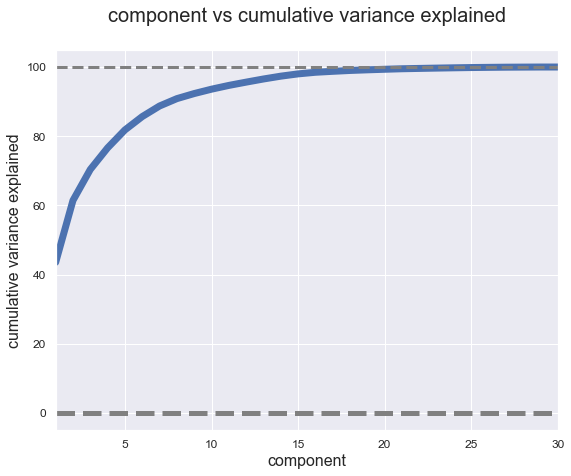

In [12]:
plot_var_exp(e_val)

### 6. Using sklearn For PCA

    from sklearn.decomposition import PCA
    
- Create an instance of PCA
- Fit to standardised X
- Plot the explained variance
- Create PairPlot of PCA

In [13]:
# ANSWER
# Create an instance of PCA
pca = PCA()
scaler = StandardScaler()
stand_X = scaler.fit_transform(cancer.X)
# Fit Xs
pca_vals = pca.fit_transform(stand_X)
pca_vals

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

In [41]:
pca.explained_variance_ratio_
num_of_features = np.arange(0,len(pca.explained_variance_ratio_))
num_of_features += 1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

<BarContainer object of 30 artists>

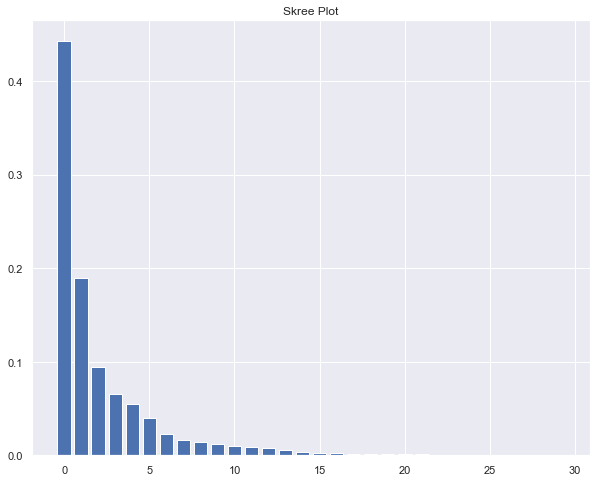

In [45]:
plt.figure(figsize=(10,8))
plt.title('Skree Plot')
plt.bar(num_of_features,pca.explained_variance_ratio_)

In [15]:
pca_vals_df = pd.DataFrame(pca_vals)

In [16]:
pca_vals_df

0          1         2         3         4         5         6   \
0     9.192837   1.948583 -1.123166  3.633731 -1.195110  1.411424  2.159370   
1     2.387802  -3.768172 -0.529293  1.118264  0.621775  0.028656  0.013358   
2     5.733896  -1.075174 -0.551748  0.912083 -0.177086  0.541452 -0.668166   
3     7.122953  10.275589 -3.232790  0.152547 -2.960878  3.053422  1.429911   
4     3.935302  -1.948072  1.389767  2.940639  0.546747 -1.226495 -0.936213   
..         ...        ...       ...       ...       ...       ...       ...   
564   6.439315  -3.576817  2.459487  1.177314 -0.074824 -2.375193 -0.596130   
565   3.793382  -3.584048  2.088476 -2.506028 -0.510723 -0.246710 -0.716326   
566   1.256179  -1.902297  0.562731 -2.089227  1.809991 -0.534447 -0.192758   
567  10.374794   1.672010 -1.877029 -2.356031 -0.033742  0.567936  0.223082   
568  -5.475243  -0.670637  1.490443 -2.299157 -0.184703  1.617837  1.698952   

           7         8         9   ...        20        21        22  \
0   -0.398407 -0.157118 -0.877402  ...  0.096515  0.068850  0.084519   
1    0.240988 -0.711905  1.106995  ... -0.077327 -0.094578 -0.217718   
2    0.097374  0.024066  0.454275  ...  0.311067 -0.060309 -0.074291   
3    1.059565 -1.405440 -1.116975  ...  0.434193 -0.203266 -0.124105   
4    0.636376 -0.263805  0.377704  ... -0.116545 -0.017650  0.139454   
..        ...       ...       ...  ...       ...       ...       ...   
564 -0.035471  0.987929  0.256989  ...  0.006888 -0.067000  0.088590   
565 -1.113360 -0.105207 -0.108632  ... -0.009802  0.019563 -0.055405   
566  0.341887  0.393917  0.520877  ... -0.036592  0.063352 -0.200312   
567 -0.280239 -0.542035 -0.089296  ...  0.140648 -0.042478  0.168820   
568  1.046354  0.374101 -0.047726  ...  0.274680 -0.243238  0.037915   

           23        24        25        26        27        28        29  
0   -0.175256 -0.151020 -0.201503 -0.252585 -0.033914  0.045648 -0.047169  
1    0.011290 -0.170510 -0.041129  0.181270  0.032624 -0.005687 -0.001868  
2    0.102762  0.171158  0.004735  0.049569  0.047026  0.003146  0.000751  
3    0.153430  0.077496 -0.275225  0.183462  0.042484 -0.069295 -0.019937  
4   -0.005332  0.003062  0.039254  0.032168 -0.034786  0.005038  0.021214  
..        ...       ...       ...       ...       ...       ...       ...  
564  0.107898  0.219520 -0.122900  0.159198  0.009853  0.007119 -0.001415  
565  0.086135  0.001197  0.065889 -0.068512 -0.023575 -0.027486 -0.010419  
566 -0.044819  0.002429  0.007095 -0.023691 -0.002578  0.006706  0.003770  
567 -0.195969  0.377830 -0.198192 -0.027409 -0.068086 -0.084163 -0.023783  
568 -0.075111 -0.017508  0.347115  0.127381 -0.009516 -0.060913 -0.019476  

[569 rows x 30 columns]

In [17]:
pca_vals_df[0].mean()

-1.5609462560634889e-18

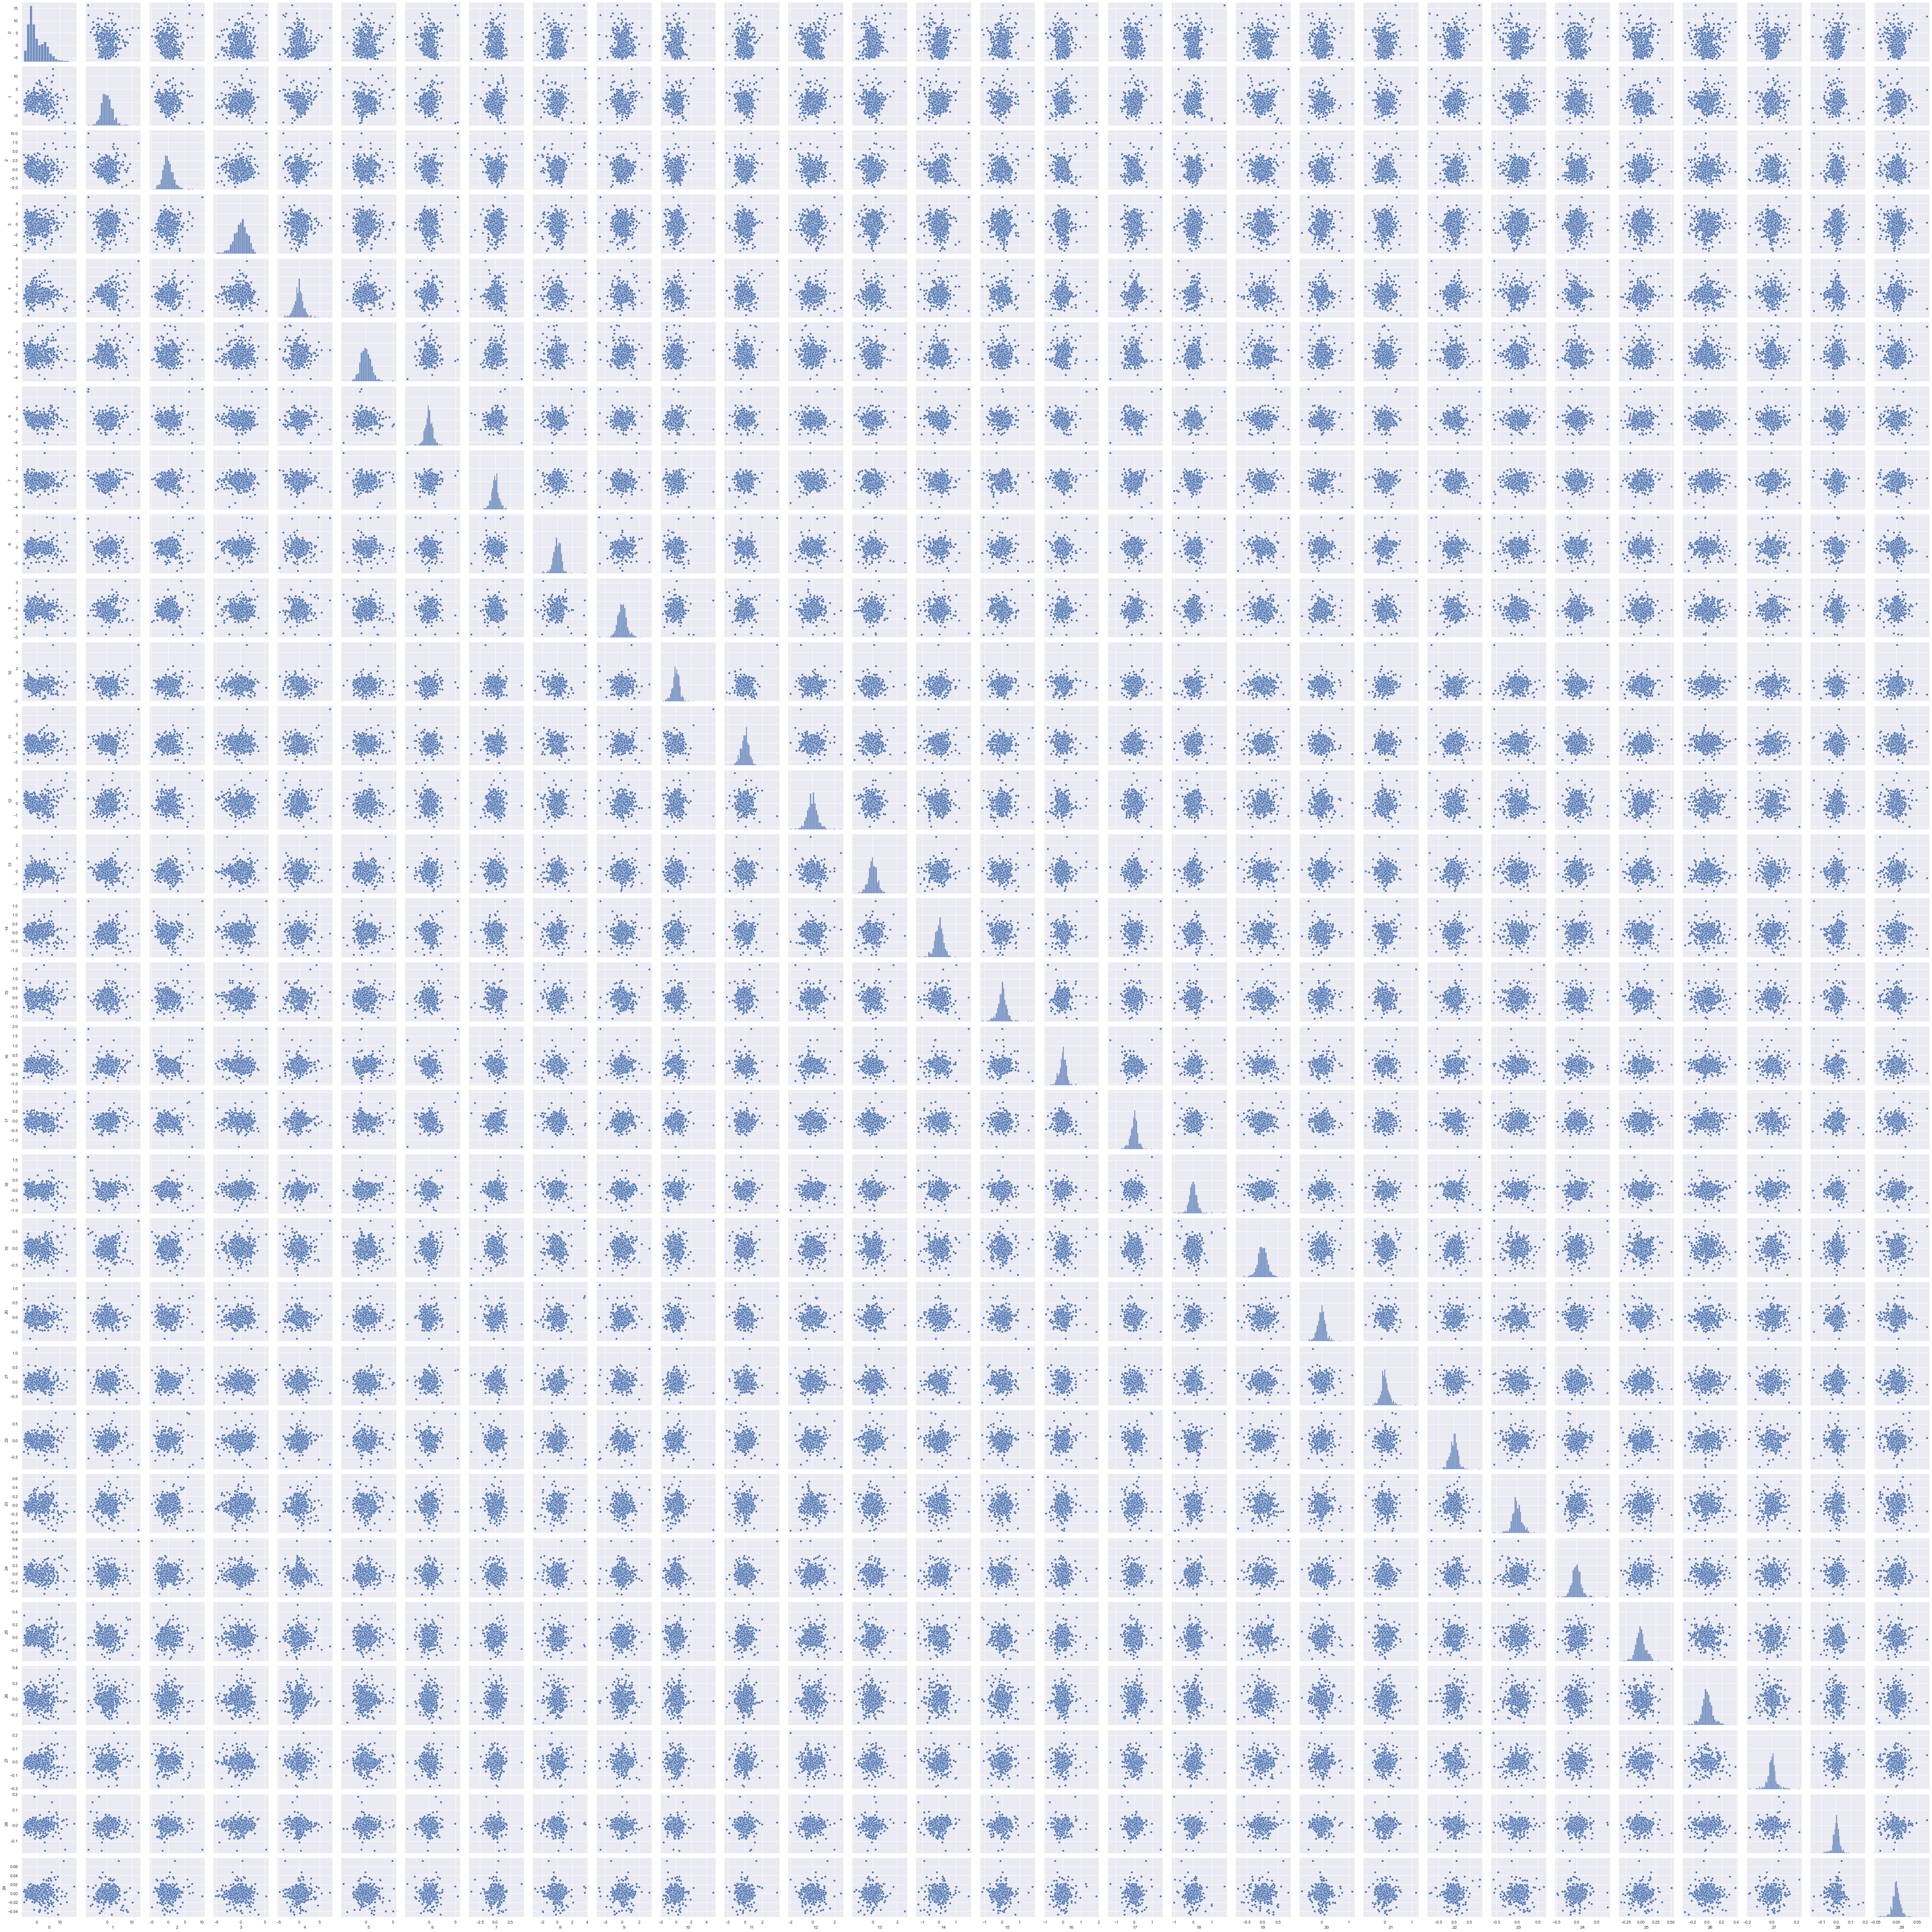

In [18]:
# ANSWER
# Plot explained_variance_ratio_
sns.pairplot(data=pca_vals_df)

### 7. Split Data to 80/20 and Use PCA you got in (6) as X

Split data 80/20 and Use KNN to find score.

In [19]:
calculate_cum_var_exp(e_val)

[43.51260290160979,
 61.42293615339271,
 70.3758230021036,
 76.6231108965918,
 81.80790587976072,
 85.66635194943382,
 88.72543568553705,
 90.85410725961523,
 92.32200010427249,
 93.58493158620627,
 94.67608080535128,
 95.62472643377878,
 96.53362735433036,
 97.34926375943392,
 98.0105520612649,
 98.47478680630911,
 98.74992605867139,
 98.99933159346561,
 99.18302734472063,
 99.34381569868306,
 99.49359893179003,
 99.58944592102702,
 99.68154156513441,
 99.76695535290675,
 99.84254450647352,
 99.89733953914347,
 99.9456897812567,
 99.97084668641781,
 99.99230543838543,
 99.99271989927294,
 99.99503604416809,
 100.00000000000004]

In [20]:
X = pca_vals_df
X

0          1         2         3         4         5         6   \
0     9.192837   1.948583 -1.123166  3.633731 -1.195110  1.411424  2.159370   
1     2.387802  -3.768172 -0.529293  1.118264  0.621775  0.028656  0.013358   
2     5.733896  -1.075174 -0.551748  0.912083 -0.177086  0.541452 -0.668166   
3     7.122953  10.275589 -3.232790  0.152547 -2.960878  3.053422  1.429911   
4     3.935302  -1.948072  1.389767  2.940639  0.546747 -1.226495 -0.936213   
..         ...        ...       ...       ...       ...       ...       ...   
564   6.439315  -3.576817  2.459487  1.177314 -0.074824 -2.375193 -0.596130   
565   3.793382  -3.584048  2.088476 -2.506028 -0.510723 -0.246710 -0.716326   
566   1.256179  -1.902297  0.562731 -2.089227  1.809991 -0.534447 -0.192758   
567  10.374794   1.672010 -1.877029 -2.356031 -0.033742  0.567936  0.223082   
568  -5.475243  -0.670637  1.490443 -2.299157 -0.184703  1.617837  1.698952   

           7         8         9   ...        20        21        22  \
0   -0.398407 -0.157118 -0.877402  ...  0.096515  0.068850  0.084519   
1    0.240988 -0.711905  1.106995  ... -0.077327 -0.094578 -0.217718   
2    0.097374  0.024066  0.454275  ...  0.311067 -0.060309 -0.074291   
3    1.059565 -1.405440 -1.116975  ...  0.434193 -0.203266 -0.124105   
4    0.636376 -0.263805  0.377704  ... -0.116545 -0.017650  0.139454   
..        ...       ...       ...  ...       ...       ...       ...   
564 -0.035471  0.987929  0.256989  ...  0.006888 -0.067000  0.088590   
565 -1.113360 -0.105207 -0.108632  ... -0.009802  0.019563 -0.055405   
566  0.341887  0.393917  0.520877  ... -0.036592  0.063352 -0.200312   
567 -0.280239 -0.542035 -0.089296  ...  0.140648 -0.042478  0.168820   
568  1.046354  0.374101 -0.047726  ...  0.274680 -0.243238  0.037915   

           23        24        25        26        27        28        29  
0   -0.175256 -0.151020 -0.201503 -0.252585 -0.033914  0.045648 -0.047169  
1    0.011290 -0.170510 -0.041129  0.181270  0.032624 -0.005687 -0.001868  
2    0.102762  0.171158  0.004735  0.049569  0.047026  0.003146  0.000751  
3    0.153430  0.077496 -0.275225  0.183462  0.042484 -0.069295 -0.019937  
4   -0.005332  0.003062  0.039254  0.032168 -0.034786  0.005038  0.021214  
..        ...       ...       ...       ...       ...       ...       ...  
564  0.107898  0.219520 -0.122900  0.159198  0.009853  0.007119 -0.001415  
565  0.086135  0.001197  0.065889 -0.068512 -0.023575 -0.027486 -0.010419  
566 -0.044819  0.002429  0.007095 -0.023691 -0.002578  0.006706  0.003770  
567 -0.195969  0.377830 -0.198192 -0.027409 -0.068086 -0.084163 -0.023783  
568 -0.075111 -0.017508  0.347115  0.127381 -0.009516 -0.060913 -0.019476  

[569 rows x 30 columns]

In [21]:
# ANSWER
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, cancer.y, test_size=0.2, random_state=42)

In [22]:
X_train

0         1         2         3         4         5         6   \
68   4.330003  9.202526  1.492963  0.319947  4.728171  2.215764 -2.581060   
181  9.007166  0.581031 -3.134715 -0.862270  0.045722  0.725774  0.845890   
63  -2.314132  3.267990  2.796224  0.565726 -0.381834  2.958284  0.210565   
248 -2.582556  0.729213 -0.548143 -2.332079 -1.835265  0.140166  0.121966   
60  -2.385836  2.757658  1.214086  1.794489 -3.338158  2.540784  0.746438   
..        ...       ...       ...       ...       ...       ...       ...   
71  -0.307856  7.387812  3.819086  2.133556  2.710703 -1.639758  2.428361   
106 -0.749271  1.797639 -0.568366 -0.560499 -0.933096 -1.610187 -0.498350   
270 -4.506563 -3.169273 -0.188062  0.391160  1.385207  1.138779  0.149404   
435  0.664441  0.436861 -2.680782 -0.729227 -0.027787 -1.082051 -0.001051   
102 -3.448184 -1.424622 -0.088724 -1.710728 -0.106617  0.343239 -0.238007   

           7         8         9   ...        20        21        22  \
68   1.299153  3.784119 -2.738158  ... -0.017983 -0.124064 -0.567641   
181 -0.591540 -1.015622  1.202655  ...  0.371564 -0.127832 -0.339877   
63  -0.627979 -0.232325  0.041402  ... -0.004352 -0.219740  0.078810   
248  0.272863  0.609655  0.350472  ...  0.075571 -0.074238  0.143228   
60  -0.910742  0.262430  1.319039  ... -0.127741  0.217030  0.033137   
..        ...       ...       ...  ...       ...       ...       ...   
71   1.318268 -1.885126  3.192639  ... -0.336436  1.143462  0.242279   
106 -0.453243  0.527566 -0.459627  ... -0.135717  0.042433  0.103295   
270  0.142013 -0.429720  0.348543  ...  0.032795  0.011579  0.072864   
435 -0.127618 -0.009942 -0.481072  ... -0.220292 -0.100706 -0.137004   
102 -0.513797  0.455175  0.153011  ... -0.356762 -0.025170 -0.029951   

           23        24        25        26        27        28        29  
68   0.112027 -0.225132  0.280675 -0.024474  0.006849  0.007401  0.012600  
181 -0.005007  0.022698  0.171675  0.010786  0.137190  0.016089  0.004134  
63   0.179010  0.066182  0.033572  0.052946 -0.081176 -0.016174  0.011427  
248  0.045596 -0.070119  0.071391  0.038009 -0.026238 -0.008614  0.001209  
60  -0.032101  0.180446  0.056921  0.071192  0.008814  0.012896 -0.006819  
..        ...       ...       ...       ...       ...       ...       ...  
71   0.346639  0.225463  0.053381  0.153505  0.029444 -0.005671  0.001874  
106  0.046283  0.012455  0.004714  0.126626  0.010281  0.010379 -0.002802  
270  0.054009  0.015417 -0.098649 -0.018595  0.020761  0.007178 -0.014086  
435 -0.053230 -0.110072 -0.129607 -0.010856 -0.033561 -0.018734 -0.002206  
102  0.098012 -0.004720 -0.014059  0.034622  0.000296  0.012560  0.000296  

[455 rows x 30 columns]

In [23]:
# ANSWER
knn = KNeighborsClassifier(n_neighbors=7)

In [24]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [25]:
knn.score(X_test,y_test)

0.9473684210526315

In [26]:
n_neighbors = np.arange(len(X_train))
n_neighbors += 1
n_neighbors

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [27]:
scores = []
for k in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,cancer.y)
    score = cross_val_score(knn, X, cancer.y,cv = 5).mean()
    scores.append(score)

Text(0.5, 0, 'K Neighbours')

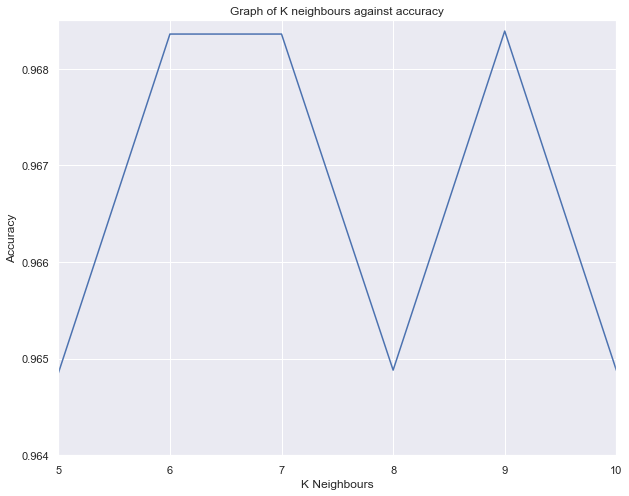

In [28]:
plt.figure(figsize=(10,8))
plt.plot(n_neighbors,scores)
plt.xlim(5,10)
plt.ylim(0.964,0.9685)
plt.title('Graph of K neighbours against accuracy')
plt.ylabel('Accuracy')
plt.xlabel('K Neighbours')

Optimal K is 7 or 9

In [30]:
cols_number = np.arange(len(X.columns))
cols_number += 1
cols_number

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [31]:
scores = []
for i in range(len(X.columns)):
    knn = KNeighborsClassifier(n_neighbors=9)
    selected_cols = X.iloc[:,0:i+1]
    knn.fit(selected_cols,cancer.y)
    score = cross_val_score(knn, selected_cols, cancer.y,cv = 5).mean()
    scores.append(score)
    

In [32]:
scores

[0.9051544791181494,
 0.9419965843813072,
 0.929731408166434,
 0.9542928116752056,
 0.9595559695699425,
 0.9525384257102936,
 0.9630957925787922,
 0.9648501785437043,
 0.9648346530041918,
 0.9648501785437045,
 0.9701288619779538,
 0.9683744760130415,
 0.971883247942866,
 0.9683744760130415,
 0.9701288619779538,
 0.9701443875174661,
 0.9701443875174661,
 0.9701443875174661,
 0.968390001552554,
 0.968390001552554,
 0.968390001552554,
 0.968390001552554,
 0.968390001552554,
 0.968390001552554,
 0.968390001552554,
 0.968390001552554,
 0.968390001552554,
 0.968390001552554,
 0.968390001552554,
 0.968390001552554]

Text(0.5, 0, 'No. of Features')

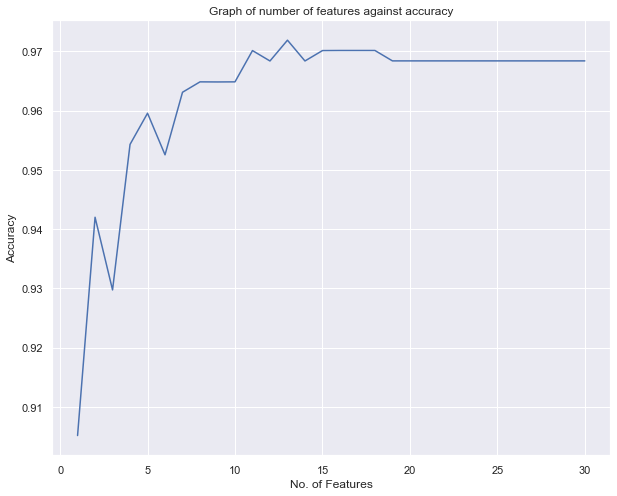

In [33]:
plt.figure(figsize=(10,8))
plt.plot(cols_number,scores)
plt.title('Graph of number of features against accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. of Features')

In [34]:
scores = []
k_vals = []
num_features = []
for i in range(len(X.columns)):
    for k in range(20):
        k_val = k + 1
        num_feature = i + 1
        knn = KNeighborsClassifier(n_neighbors=k_val,n_jobs=-1)
        selected_cols = X.iloc[:,0:num_feature]
        knn.fit(selected_cols,cancer.y)
        score = cross_val_score(knn, selected_cols, cancer.y,cv = 5,n_jobs=-1).mean()
        scores.append(score)
        k_vals.append(k_val)
        num_features.append(num_feature)
        
        print('''The score of the model is {score},
                 We are currently using {k} neighbors, and {i} features
              '''.format(score=score,k=k_val,i=num_feature))

The score of the model is 0.8734513274336283,
                 We are currently using 1 neighbors, and 1 features
              
The score of the model is 0.8699580810433163,
                 We are currently using 2 neighbors, and 1 features
              
The score of the model is 0.8840397453811519,
                 We are currently using 3 neighbors, and 1 features
              
The score of the model is 0.9016301816488124,
                 We are currently using 4 neighbors, and 1 features
              
The score of the model is 0.8980748331004502,
                 We are currently using 5 neighbors, and 1 features
              
The score of the model is 0.9051700046576618,
                 We are currently using 6 neighbors, and 1 features
              
The score of the model is 0.9051544791181494,
                 We are currently using 7 neighbors, and 1 features
              
The score of the model is 0.9034156186927497,
                 We are currently using 8 neighbors

The score of the model is 0.9543238627542306,
                 We are currently using 14 neighbors, and 4 features
              
The score of the model is 0.9578636857630801,
                 We are currently using 15 neighbors, and 4 features
              
The score of the model is 0.9596180717279925,
                 We are currently using 16 neighbors, and 4 features
              
The score of the model is 0.9596180717279925,
                 We are currently using 17 neighbors, and 4 features
              
The score of the model is 0.9508306163639186,
                 We are currently using 18 neighbors, and 4 features
              
The score of the model is 0.9543549138332557,
                 We are currently using 19 neighbors, and 4 features
              
The score of the model is 0.9508461419034312,
                 We are currently using 20 neighbors, and 4 features
              
The score of the model is 0.9490141282409563,
                 We are currently using 1 ne

The score of the model is 0.9612793044558299,
                 We are currently using 3 neighbors, and 8 features
              
The score of the model is 0.9630647414997672,
                 We are currently using 4 neighbors, and 8 features
              
The score of the model is 0.9630647414997672,
                 We are currently using 5 neighbors, and 8 features
              
The score of the model is 0.9683434249340165,
                 We are currently using 6 neighbors, and 8 features
              
The score of the model is 0.9630492159602546,
                 We are currently using 7 neighbors, and 8 features
              
The score of the model is 0.9648501785437045,
                 We are currently using 8 neighbors, and 8 features
              
The score of the model is 0.9648501785437043,
                 We are currently using 9 neighbors, and 8 features
              
The score of the model is 0.9613569321533924,
                 We are currently using 10 neighbor

The score of the model is 0.9701443875174662,
                 We are currently using 10 neighbors, and 11 features
              
The score of the model is 0.9701443875174662,
                 We are currently using 11 neighbors, and 11 features
              
The score of the model is 0.9613569321533924,
                 We are currently using 12 neighbors, and 11 features
              
The score of the model is 0.9595870206489675,
                 We are currently using 13 neighbors, and 11 features
              
The score of the model is 0.9596025461884802,
                 We are currently using 14 neighbors, and 11 features
              
The score of the model is 0.9613569321533924,
                 We are currently using 15 neighbors, and 11 features
              
The score of the model is 0.9578481602235678,
                 We are currently using 16 neighbors, and 11 features
              
The score of the model is 0.95960254618848,
                 We are currently using

The score of the model is 0.956078248719143,
                 We are currently using 16 neighbors, and 14 features
              
The score of the model is 0.956078248719143,
                 We are currently using 17 neighbors, and 14 features
              
The score of the model is 0.9508150908244062,
                 We are currently using 18 neighbors, and 14 features
              
The score of the model is 0.9508150908244062,
                 We are currently using 19 neighbors, and 14 features
              
The score of the model is 0.9525694767893185,
                 We are currently using 20 neighbors, and 14 features
              
The score of the model is 0.9542772861356932,
                 We are currently using 1 neighbors, and 15 features
              
The score of the model is 0.9507840397453812,
                 We are currently using 2 neighbors, and 15 features
              
The score of the model is 0.9577705325260053,
                 We are currently using 3

The score of the model is 0.9525694767893185,
                 We are currently using 20 neighbors, and 17 features
              
The score of the model is 0.952522900170781,
                 We are currently using 1 neighbors, and 18 features
              
The score of the model is 0.9525539512498058,
                 We are currently using 2 neighbors, and 18 features
              
The score of the model is 0.9577705325260053,
                 We are currently using 3 neighbors, and 18 features
              
The score of the model is 0.9613103555348548,
                 We are currently using 4 neighbors, and 18 features
              
The score of the model is 0.9648501785437045,
                 We are currently using 5 neighbors, and 18 features
              
The score of the model is 0.9701288619779536,
                 We are currently using 6 neighbors, and 18 features
              
The score of the model is 0.9683589504735289,
                 We are currently using 7 ne

The score of the model is 0.9630647414997672,
                 We are currently using 4 neighbors, and 21 features
              
The score of the model is 0.9648501785437045,
                 We are currently using 5 neighbors, and 21 features
              
The score of the model is 0.9683589504735288,
                 We are currently using 6 neighbors, and 21 features
              
The score of the model is 0.9683589504735289,
                 We are currently using 7 neighbors, and 21 features
              
The score of the model is 0.9648812296227295,
                 We are currently using 8 neighbors, and 21 features
              
The score of the model is 0.968390001552554,
                 We are currently using 9 neighbors, and 21 features
              
The score of the model is 0.9648812296227295,
                 We are currently using 10 neighbors, and 21 features
              
The score of the model is 0.9648657040832168,
                 We are currently using 11 n

The score of the model is 0.9578326346840553,
                 We are currently using 16 neighbors, and 24 features
              
The score of the model is 0.9578326346840551,
                 We are currently using 17 neighbors, and 24 features
              
The score of the model is 0.9543238627542309,
                 We are currently using 18 neighbors, and 24 features
              
The score of the model is 0.9543238627542309,
                 We are currently using 19 neighbors, and 24 features
              
The score of the model is 0.9543238627542309,
                 We are currently using 20 neighbors, and 24 features
              
The score of the model is 0.9507685142058687,
                 We are currently using 1 neighbors, and 25 features
              
The score of the model is 0.9525539512498058,
                 We are currently using 2 neighbors, and 25 features
              
The score of the model is 0.9577705325260053,
                 We are currently using

The score of the model is 0.9683589504735288,
                 We are currently using 6 neighbors, and 28 features
              
The score of the model is 0.9683589504735289,
                 We are currently using 7 neighbors, and 28 features
              
The score of the model is 0.9648812296227295,
                 We are currently using 8 neighbors, and 28 features
              
The score of the model is 0.968390001552554,
                 We are currently using 9 neighbors, and 28 features
              
The score of the model is 0.9648812296227295,
                 We are currently using 10 neighbors, and 28 features
              
The score of the model is 0.9631113181183046,
                 We are currently using 11 neighbors, and 28 features
              
The score of the model is 0.9631113181183046,
                 We are currently using 12 neighbors, and 28 features
              
The score of the model is 0.9648812296227295,
                 We are currently using 13

In [35]:
##The score of the model is 0.9736531594472908, We are currently using 6 neighbors, and 10 features

scores.sort(reverse=True)

In [36]:
scores

[0.9736531594472908,
 0.971883247942866,
 0.971883247942866,
 0.971883247942866,
 0.971883247942866,
 0.971883247942866,
 0.9701443875174662,
 0.9701443875174662,
 0.9701443875174661,
 0.9701443875174661,
 0.9701443875174661,
 0.9701288619779538,
 0.9701288619779538,
 0.9701288619779538,
 0.9701288619779536,
 0.9701288619779536,
 0.9701133364384411,
 0.9701133364384411,
 0.9701133364384411,
 0.9701133364384411,
 0.9701133364384411,
 0.9701133364384411,
 0.968390001552554,
 0.968390001552554,
 0.968390001552554,
 0.968390001552554,
 0.968390001552554,
 0.968390001552554,
 0.968390001552554,
 0.968390001552554,
 0.968390001552554,
 0.968390001552554,
 0.968390001552554,
 0.968390001552554,
 0.968390001552554,
 0.968390001552554,
 0.9683744760130415,
 0.9683744760130415,
 0.9683744760130415,
 0.9683589504735289,
 0.9683589504735289,
 0.9683589504735289,
 0.9683589504735289,
 0.9683589504735289,
 0.9683589504735289,
 0.9683589504735289,
 0.9683589504735289,
 0.9683589504735289,
 0.96835895

# The parameters below gave the best score for odd numbered neighbors.

The score of the model is 0.971883247942866. We are currently using 9 neighbors, and 13 features.


The score of the model is 0.971883247942866. We are currently using 7 neighbors, and 17 features.


The score of the model is 0.971883247942866. We are currently using 7 neighbors, and 22 features.



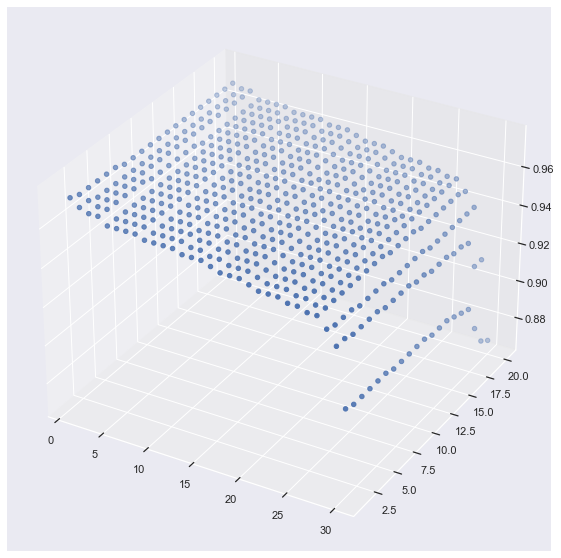

In [37]:
#My attempt at visualzing
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.scatter(num_features, k_vals,scores)

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Breast Cancer Machine Learning Prediction](https://gtraskas.github.io/post/breast_cancer/)

[Understanding PCA (Principal Component Analysis) with Python](https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



